In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


   * Customer ID = Identificação única de um cliente
   * Gender = Gênero do cliente
   * Age = Idade do consumidor
   * Annual Income = Renda anual do cliente
   * Spending Score = Pontuação atribuida pelo shopping com base no comportamento do cliente e na natureza do gasto

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


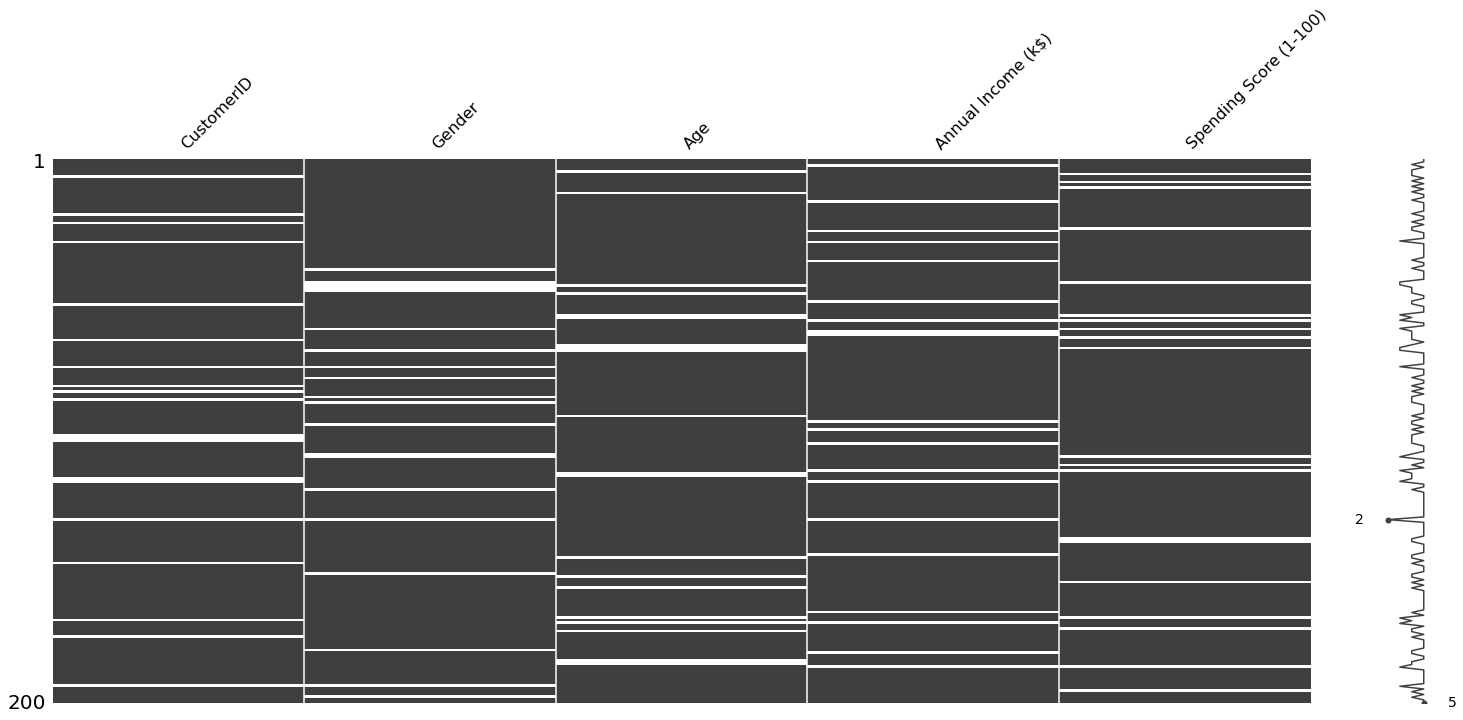

In [8]:
import missingno as msno
msno.matrix(customers);

In [9]:
# Adicionando valores nulos
customers_null = customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

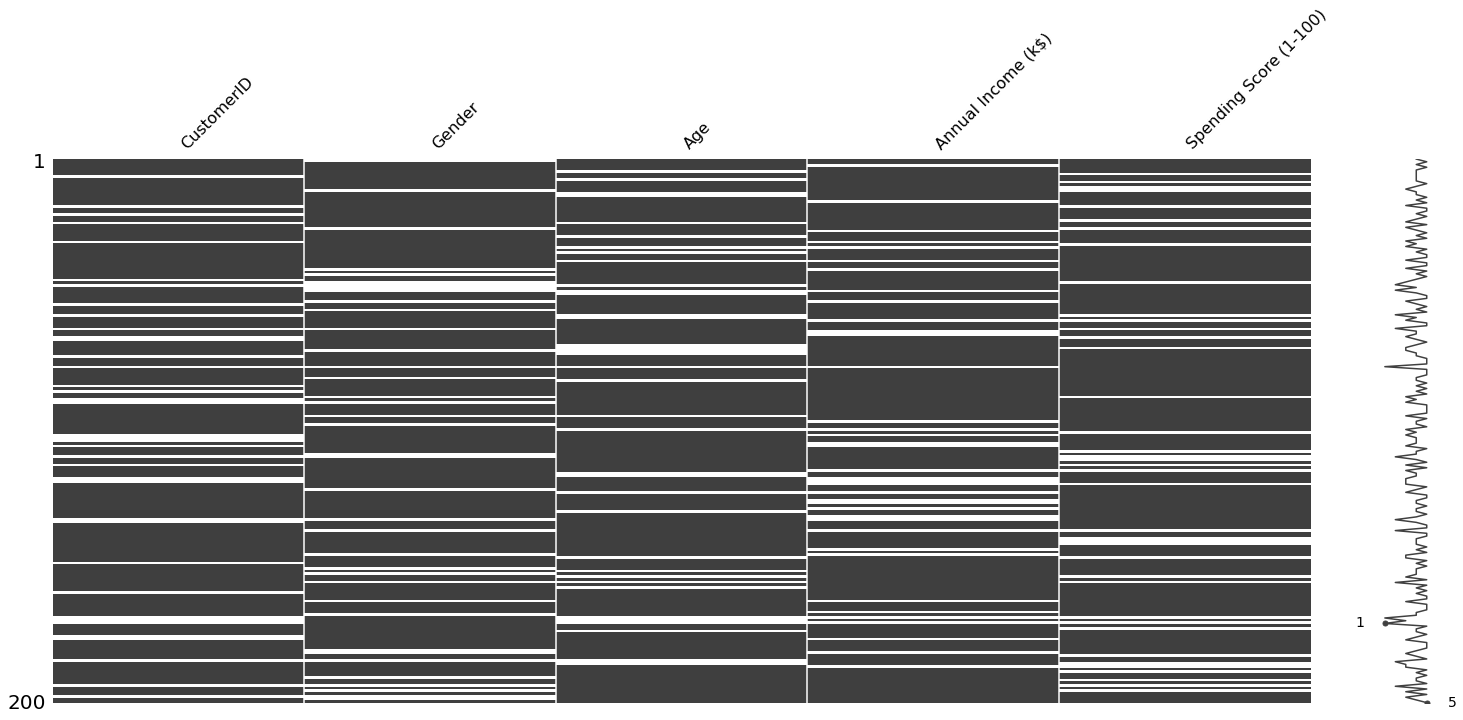

In [10]:
msno.matrix(customers_null);

In [11]:
customers_null.isnull().sum()

CustomerID                38
Gender                    38
Age                       37
Annual Income (k$)        38
Spending Score (1-100)    39
dtype: int64

In [12]:
# deletando as linhas que possuem algum valor nulo
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2.0,Male,21.0,15.0,81.0
3,4.0,Female,23.0,16.0,77.0
9,10.0,Female,30.0,19.0,72.0
14,15.0,Male,37.0,20.0,13.0
16,17.0,Female,35.0,21.0,35.0
...,...,...,...,...,...
189,190.0,Female,36.0,103.0,85.0
192,193.0,Male,33.0,113.0,8.0
194,195.0,Female,47.0,120.0,16.0
196,197.0,Female,45.0,126.0,28.0


In [13]:
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,0.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,0.0,17.0,40.0
...,...,...,...,...,...
195,196.0,0,35.0,120.0,0.0
196,197.0,Female,45.0,126.0,28.0
197,0.0,0,32.0,126.0,74.0
198,199.0,0,32.0,137.0,18.0


In [14]:
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,162.000000,163.00000,162.000000,161.000000
mean,100.055556,39.04908,60.413580,50.298137
std,58.868867,14.22908,27.386955,25.187260
min,1.000000,18.00000,15.000000,1.000000
25%,48.250000,28.00000,40.000000,35.000000
50%,99.500000,36.00000,60.000000,50.000000
75%,150.750000,49.00000,78.000000,73.000000
max,200.000000,70.00000,137.000000,98.000000


In [15]:
# Preenchendo os valores medios da coluna
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,NaN,19.00000,15.00000,39.000000
1,2.000000,Male,21.00000,15.00000,81.000000
2,3.000000,Female,20.00000,60.41358,6.000000
3,4.000000,Female,23.00000,16.00000,77.000000
4,5.000000,Female,39.04908,17.00000,40.000000
...,...,...,...,...,...
195,196.000000,NaN,35.00000,120.00000,50.298137
196,197.000000,Female,45.00000,126.00000,28.000000
197,100.055556,NaN,32.00000,126.00000,74.000000
198,199.000000,NaN,32.00000,137.00000,18.000000


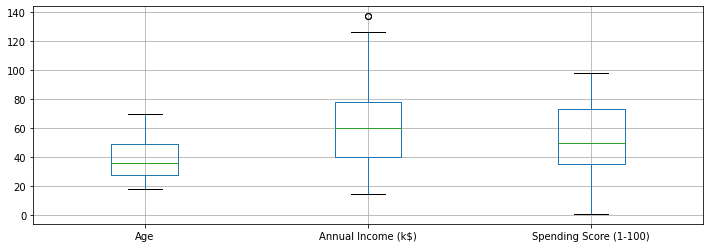

In [16]:
# Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot.
plt.figure(figsize=(12,4))
customers.boxplot(
    column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [17]:
# Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o Z-score
from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result = np.where(z > threshold)

df_salario_outlier = customers.iloc[result[0]]

/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [18]:
df_salario_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


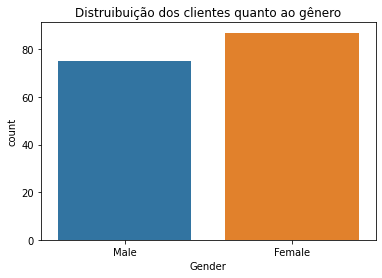

In [20]:
# Explorando os dados. Entendendo alguns relacionamentos e comportamentos dos clientes
sns.countplot(x='Gender', data=customers)
plt.title('Distruibuição dos clientes quanto ao gênero');

  **Aplicando a codificação aos dados**

In [21]:
cat_df_customers = customers.select_dtypes(include=['object']) # copiando as colunas que são do tipo categoricas

In [22]:
cat_df_customers.head()

,Gender
0,NaN
1,Male
2,Female
3,Female
4,Female


  **Aplicando o Mapeamento**

In [23]:
# define o dicionario a ser utilizado (map)
replace_map = {'Gender': {'Male': 1, 'Female': 2}}
# encontra a lista das variaveis categoricas
labels = cat_df_customers['Gender'].astype(
    'category').cat.categories.tolist()
replace_map_comp = {'Gender': {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}} #define o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [24]:
cat_df_customers_replace = pd.read_csv('Mall_Customers.csv')

In [25]:
cat_df_customers_replace.replace(replace_map_comp, inplace=True)
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


  **Aplicando o Label Encodering**

In [26]:
customers = pd.read_csv('Mall_Customers.csv')

In [27]:
cat_df_customers_lc=customers

In [28]:
cat_df_customers_lc['Gender'] = pd.Categorical(cat_df_customers_lc['Gender'])

In [29]:
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [30]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes

In [31]:
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
customers_label = pd.read_csv('Mall_Customers.csv')
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**One hot Enconding**

In [35]:
customers_one_hot = pd.read_csv('Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [36]:
customers = pd.read_csv('Mall_Customers.csv')

In [37]:
customers_one_hot=customers
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [38]:
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray()
customers_ohe.shape

(200, 2)

In [39]:
customers_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.